In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#1bi: Scatterplots of Independent Variables

/Users/kathydeng/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/kathydeng/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


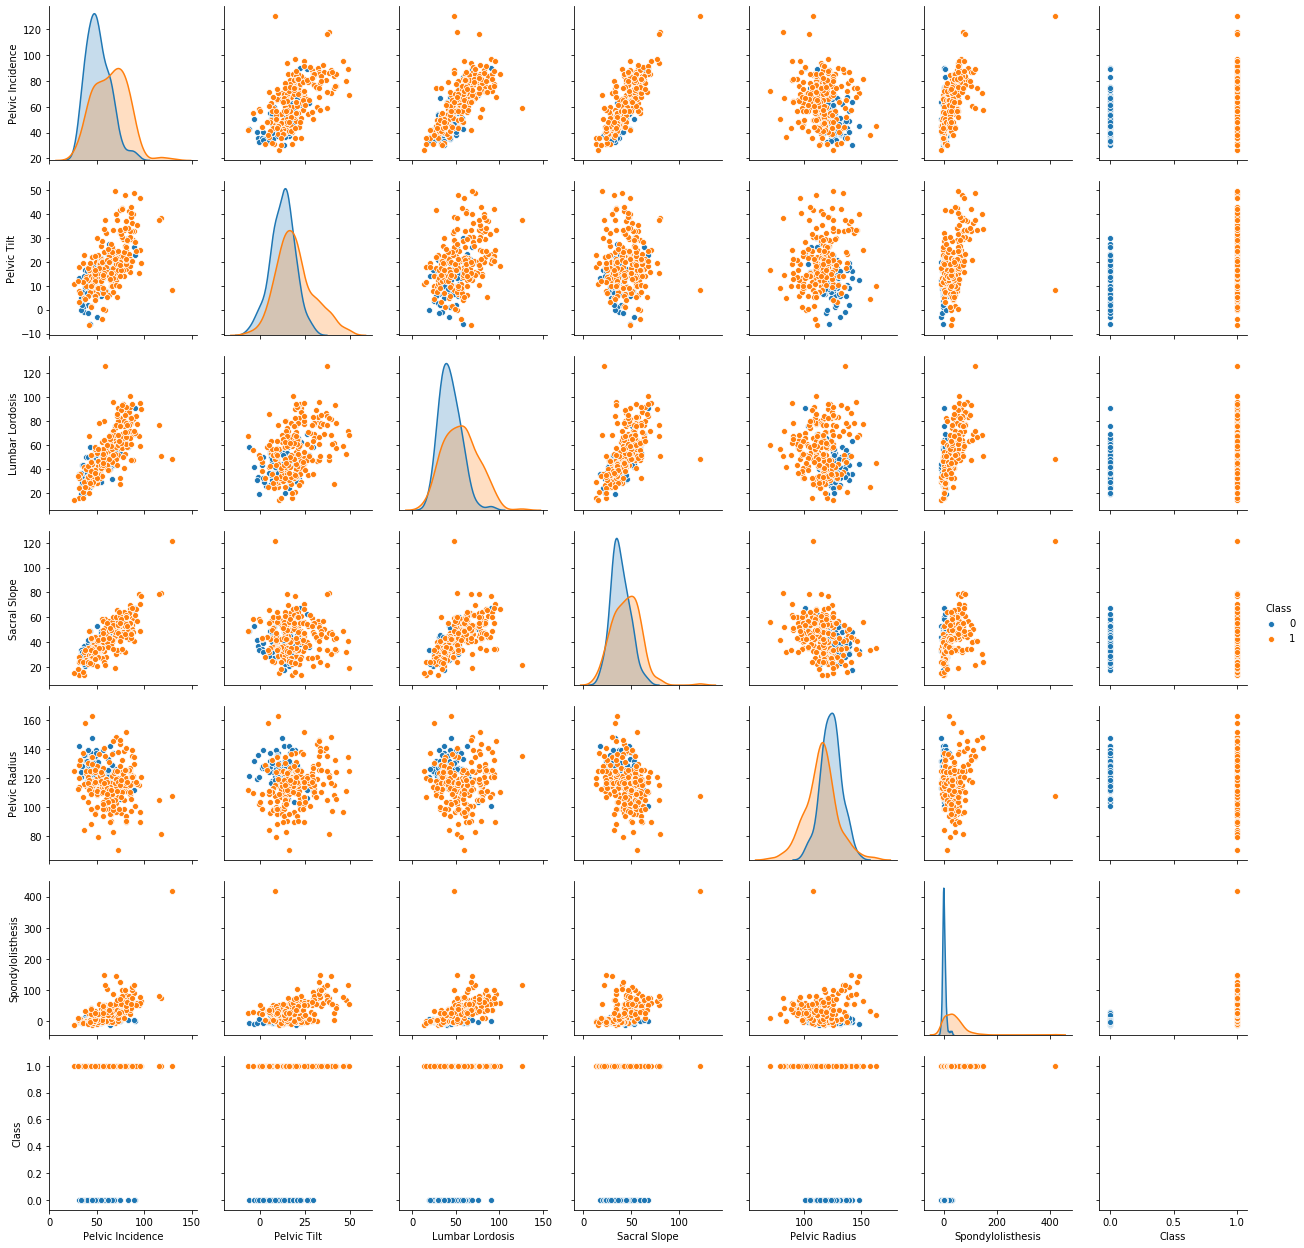

In [5]:
bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])

#Scatterplots
%matplotlib inline
sns.pairplot(bio_df,hue="Class")
plt.show()

#1bii: Boxplots of Independent Variables

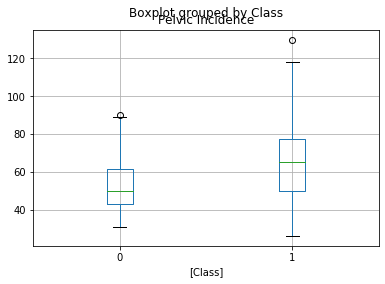

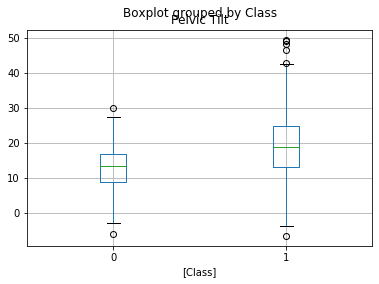

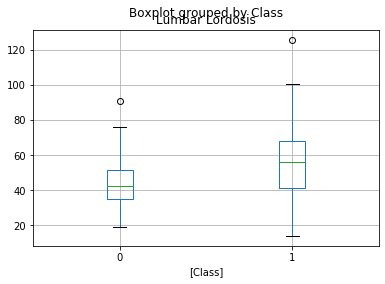

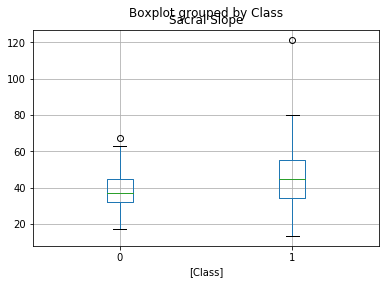

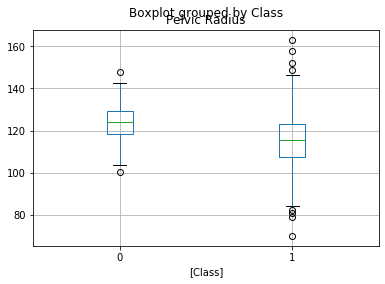

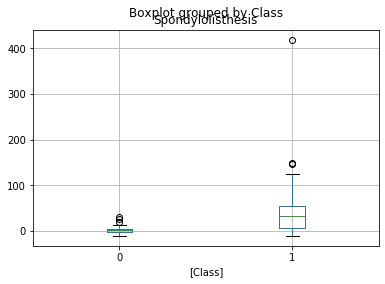

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


%matplotlib inline
bp1 = bio_df.iloc[:,[0,6]].boxplot(by="Class")
bp2 = bio_df.iloc[:,[1,6]].boxplot(by="Class")
bp3 = bio_df.iloc[:,[2,6]].boxplot(by="Class")
bp4 = bio_df.iloc[:,[3,6]].boxplot(by="Class")
bp5 = bio_df.iloc[:,[4,6]].boxplot(by="Class")
bp6 = bio_df.iloc[:,[5,6]].boxplot(by="Class")
plt.show()

#1biii: Create Training and Test Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#trainData includes the 6 features (1st 70 rows of Class 0 and 1st 140 rows of class 1)
trainData = bio_df[bio_df.Class==0].iloc[:70,0:6]
trainData = trainData.append(bio_df[bio_df.Class==1].iloc[:140,0:6])

#trainClass includes just the "Class" column
trainClass = bio_df[bio_df.Class==0].iloc[:70,6]
trainClass = trainClass.append(bio_df[bio_df.Class==1].iloc[:140,6])

#testData includes the 6 features
testData = bio_df[bio_df.Class==0].iloc[70:,0:6]
testData = testData.append(bio_df[bio_df.Class==1].iloc[140:,0:6])

#testClass includes just the "Class" column
testClass = bio_df[bio_df.Class==0].iloc[70:,6]
testClass = testClass.append(bio_df[bio_df.Class==1].iloc[140:,6])

#1cii: KNN with Euclidean Metric

k*:  4


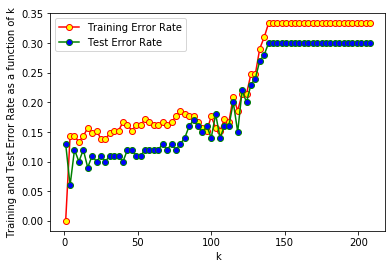

[[25  5]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#Generate k values
kValues = []
for k in range(1,211,3):
    kValues.append(k)
    
#Store train and test error rates
trainScore = []
testScore = []
minTrainError = []

#Loop through each k, calculating and storing train and test errors
for k in kValues:
    knn = KNeighborsClassifier(metric='euclidean', n_neighbors = k)
    knn.fit(trainData, trainClass)
    trainPred = knn.predict(trainData)
    testPred = knn.predict(testData)
    trainScore.append(1-accuracy_score(trainClass, trainPred))
    testScore.append(1-accuracy_score(testClass, testPred))
    
#Output minimum test error and store minimum training error (excluding k=1)
print("k*: ", testScore.index(min(testScore))*3+1)
minTrainError.append(min(trainScore[1:]))

#Plot training and test error rate as a function of k
plt.plot(kValues, trainScore, color = 'red', marker='o', markerfacecolor = 'yellow', label = 'Training Error Rate')
plt.plot(kValues, testScore, color = 'green', marker='o', markerfacecolor = 'blue', label = 'Test Error Rate')
plt.xlabel('k')
plt.ylabel('Training and Test Error Rate as a function of k')
plt.legend()
plt.show()

#Calculate the confusion matrix with true positive/negative rate, precision, and F-score for k = k*
k_n_n = KNeighborsClassifier(n_neighbors = (testScore.index(min(testScore))*3+1), metric='euclidean')
k_n_n.fit(trainData, trainClass)
print(confusion_matrix(testClass, k_n_n.predict(testData)))
print(metrics.classification_report(testClass, k_n_n.predict(testData)))

#1ciii: Training Set Size and Test Error Rate Learning Curve

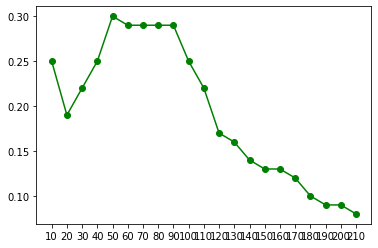

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#Generate N values
N = []
for n in range(10,220,10):
    N.append(n)
kTestError = []
for value in N:
    trainingScore = []
    testingScore = []
    
    #Choose the first N/3 rows of Class 0
    #Choose the first N-[N/3] rows of Class 1
    nNO = round(value/3)
    nAB = round(value - (value/3))
    trainingData = bio_df[bio_df.Class==0].iloc[0:nNO,0:6]
    trainingData = trainingData.append(bio_df[bio_df.Class==1].iloc[0:nAB,0:6])
    trainingClass = bio_df[bio_df.Class==0].iloc[0:nNO,6]
    trainingClass = trainingClass.append(bio_df[bio_df.Class==1].iloc[0:nAB,6])
    
    #Generate k values while making sure k < N
    k = []
    newK = 1
    while newK < value:
        k.append(newK)
        newK = newK + 5
        
    #Loop through each k, calculating and storing train and test errors
    for eachK in k:
        knn = KNeighborsClassifier(n_neighbors = eachK, metric='euclidean')
        knn.fit(trainingData, trainingClass)
        trainingPred = knn.predict(trainingData)
        testingPred = knn.predict(testData)
        testingScore.append(1-accuracy_score(testClass, testingPred))
        trainingScore.append(1-accuracy_score(trainingClass, trainingPred))
        
    #Store best test and training error rate for each N
    kTestError.append(min(testingScore))   
    minTrainError.append(min(trainingScore[1:]))

#Plot test error as a function of N (training set size)
plt.plot(N, kTestError, color='green', marker='o')
plt.xticks(np.arange(min(N), max(N)+10, 10))
plt.show()

#1diA: Best k for Manhattan Distance

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#Generate k values
weightK = []
for element in range(1,200,5):
    weightK.append(element)

testTable = {}
teScore = []
trScore = []

#Loop through each k, calculating and storing train and test errors
for eachK in weightK:
    knn = KNeighborsClassifier(n_neighbors = eachK, p=1,metric='minkowski')
    knn.fit(trainData, trainClass)
    trainPred = knn.predict(trainData)
    testPred = knn.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
    
    #Print and update test error table
    print(eachK, ": ", 1-accuracy_score(testClass,testPred))
    testTable.update({eachK: 1-accuracy_score(testClass,testPred)})
    
#Output test error table and best k
print("Best k: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))

#Store best training error rate
minTrainError.append(min(trScore[1:]))

1 :  0.12
6 :  0.10999999999999999
11 :  0.10999999999999999
16 :  0.12
21 :  0.12
26 :  0.10999999999999999
31 :  0.12
36 :  0.13
41 :  0.13
46 :  0.13
51 :  0.14
56 :  0.13
61 :  0.15000000000000002
66 :  0.15000000000000002
71 :  0.14
76 :  0.14
81 :  0.16000000000000003
86 :  0.15000000000000002
91 :  0.19999999999999996
96 :  0.19999999999999996
101 :  0.21999999999999997
106 :  0.20999999999999996
111 :  0.22999999999999998
116 :  0.20999999999999996
121 :  0.21999999999999997
126 :  0.24
131 :  0.28
136 :  0.28
141 :  0.30000000000000004
146 :  0.30000000000000004
151 :  0.30000000000000004
156 :  0.30000000000000004
161 :  0.30000000000000004
166 :  0.30000000000000004
171 :  0.30000000000000004
176 :  0.30000000000000004
181 :  0.30000000000000004
186 :  0.30000000000000004
191 :  0.30000000000000004
196 :  0.30000000000000004
Best k:  6  Best Test Error:  0.10999999999999999


#1diB: Best log(p) for Minkowski Distance

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


testTable = {}
teScore = []
trScore = []
logP = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
pList = []

#Generate log p
for power in logP:
    pList.append(math.pow(10,power))
    
#Loop through each p, calculating and storing train and test errors
for pValue in pList:
    #k = 6 from 1diA
    knn = KNeighborsClassifier(n_neighbors = 6, p=pValue, metric='minkowski')
    knn.fit(trainData, trainClass)
    trainPred = knn.predict(trainData)
    testPred = knn.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
    
    #Print and update test error table
    print(pValue, ": ", 1-accuracy_score(testClass,testPred))
    testTable.update({pValue: 1-accuracy_score(testClass,testPred)})

#Calculate best log p
bestLogP = (teScore.index(min(teScore))/10)+0.1

#Output best log 10 p with best test error
print("Best log p: ", bestLogP, " Best Test Error: ", min(teScore))

1.2589254117941673 :  0.08999999999999997
1.5848931924611136 :  0.08999999999999997
1.9952623149688795 :  0.07999999999999996
2.51188643150958 :  0.07999999999999996
3.1622776601683795 :  0.07999999999999996
3.9810717055349722 :  0.06000000000000005
5.011872336272722 :  0.06999999999999995
6.309573444801933 :  0.07999999999999996
7.943282347242816 :  0.08999999999999997
10.0 :  0.08999999999999997
Best log p:  0.6  Best Test Error:  0.06000000000000005


#1diC: Best k for Chebyshev Distance

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#Generate k values
weightK = []
for element in range(1,200,5):
    weightK.append(element)
    
testTable = {}
teScore = []
trScore = []
for eachK in weightK:
    knn = KNeighborsClassifier(n_neighbors = eachK, metric='chebyshev')
    knn.fit(trainData, trainClass)
    trainPred = knn.predict(trainData)
    testPred = knn.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
    
    #Print and update test error table
    print(eachK, ": ", 1-accuracy_score(testClass,testPred))
    testTable.update({eachK: 1-accuracy_score(testClass,testPred)})
    
#Output best k and test error for Chebyshev Distance
print("Best k: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))
minTrainError.append(min(trScore[1:]))

1 :  0.13
6 :  0.09999999999999998
11 :  0.12
16 :  0.07999999999999996
21 :  0.10999999999999999
26 :  0.12
31 :  0.12
36 :  0.09999999999999998
41 :  0.13
46 :  0.12
51 :  0.12
56 :  0.12
61 :  0.14
66 :  0.13
71 :  0.14
76 :  0.10999999999999999
81 :  0.14
86 :  0.12
91 :  0.15000000000000002
96 :  0.14
101 :  0.18999999999999995
106 :  0.18000000000000005
111 :  0.18000000000000005
116 :  0.18000000000000005
121 :  0.20999999999999996
126 :  0.20999999999999996
131 :  0.25
136 :  0.28
141 :  0.30000000000000004
146 :  0.30000000000000004
151 :  0.30000000000000004
156 :  0.30000000000000004
161 :  0.30000000000000004
166 :  0.30000000000000004
171 :  0.30000000000000004
176 :  0.30000000000000004
181 :  0.30000000000000004
186 :  0.30000000000000004
191 :  0.30000000000000004
196 :  0.30000000000000004
Best k:  16  Best Test Error:  0.07999999999999996


#1dii: Best k for Mahalanobis Distance

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


#Generate k values
weightK = []
for element in range(1,200,5):
    weightK.append(element)

testTable = {}
teScore = []
trScore = []

#Invert the covariance matrix of the training data
trainCov = np.cov(trainData)
trainCovInv = np.linalg.inv(trainCov)

#Loop through each k value to calculate test and training error rate
for eachK in weightK:
    knn = KNeighborsClassifier(n_neighbors = eachK, algorithm = 'brute', metric='mahalanobis', metric_params={'VI': trainCovInv})
    knn.fit(trainData, trainClass)
    trainPred = knn.predict(trainData)
    testPred = knn.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
    
    #Print and update test error table
    print(eachK, ": ", 1-accuracy_score(testClass,testPred))
    testTable.update({eachK: 1-accuracy_score(testClass,testPred)})

#Output best k and test error for Mahalanobis Distance
print("Best k: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))
minTrainError.append(min(trScore[1:]))

1 :  0.24
6 :  0.25
11 :  0.25
16 :  0.21999999999999997
21 :  0.28
26 :  0.24
31 :  0.22999999999999998
36 :  0.21999999999999997
41 :  0.22999999999999998
46 :  0.22999999999999998
51 :  0.24
56 :  0.21999999999999997
61 :  0.22999999999999998
66 :  0.22999999999999998
71 :  0.27
76 :  0.27
81 :  0.28
86 :  0.29000000000000004
91 :  0.29000000000000004
96 :  0.29000000000000004
101 :  0.29000000000000004
106 :  0.29000000000000004
111 :  0.29000000000000004
116 :  0.29000000000000004
121 :  0.29000000000000004
126 :  0.29000000000000004
131 :  0.29000000000000004
136 :  0.30000000000000004
141 :  0.30000000000000004
146 :  0.30000000000000004
151 :  0.30000000000000004
156 :  0.30000000000000004
161 :  0.30000000000000004
166 :  0.30000000000000004
171 :  0.30000000000000004
176 :  0.30000000000000004
181 :  0.30000000000000004
186 :  0.30000000000000004
191 :  0.30000000000000004
196 :  0.30000000000000004
Best k:  16  Best Test Error:  0.21999999999999997


#1e: Best Test Errors for Weighted Euclidean, Manhattan, and Chebyshev

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

bio_df = pd.read_csv('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW1/column_2C.dat', delimiter=" ", names=["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis", "Sacral Slope", "Pelvic Radius", "Spondylolisthesis", "Class"], header=None)

#Binary Classification
mapping = {'NO' : 0, 'AB' : 1}
bio_df['Class'] = bio_df['Class'].apply(lambda x: mapping[x])


teScore = []
trScore = []
#Loop through each k to find best test and training error for Euclidean
for eachK in weightK:
    knn_d = KNeighborsClassifier(n_neighbors = eachK, weights='distance', metric='euclidean')
    knn_d.fit(trainData, trainClass)
    trainPred = knn_d.predict(trainData)
    testPred = knn_d.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
print("Euclidean distance\nk: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))
minTrainError.append(min(trScore[1:]))

#Loop through each k to find best test and training error for Manhattan
teScore = []
trScore = []
for eachK in weightK:
    knn_d = KNeighborsClassifier(n_neighbors = eachK, weights='distance', p=1, metric='manhattan')
    knn_d.fit(trainData, trainClass)
    trainPred = knn_d.predict(trainData)
    testPred = knn_d.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
print("Manhattan distance\nk: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))
minTrainError.append(min(trScore[1:]))

#Loop through each k to find test and training error for Chebyshev
teScore = []
trScore = []
for eachK in weightK:
    knn_d = KNeighborsClassifier(n_neighbors = eachK, weights='distance', metric='chebyshev')
    knn_d.fit(trainData, trainClass)
    trainPred = knn_d.predict(trainData)
    testPred = knn_d.predict(testData)
    teScore.append(1-accuracy_score(testClass, testPred))
    trScore.append(1-accuracy_score(trainClass, trainPred))
print("Chebyshev distance\nk: ", teScore.index(min(teScore))*5+1, " Best Test Error: ", min(teScore))
minTrainError.append(min(trScore[1:]))

Euclidean distance
k:  6  Best Test Error:  0.09999999999999998
Manhattan distance
k:  26  Best Test Error:  0.09999999999999998
Chebyshev distance
k:  16  Best Test Error:  0.10999999999999999


#1f: Lowest Training Error Rate

In [35]:
print("Lowest Training Error Rate: ", min(minTrainError))

0.0
